In [251]:
# 
# BikeShare Pollution Analysis
#
#
# Created by William Zeng on October 20, 2018
# Copyright © 2018 MD Abir Choudhury. All rights reserved.
#

In [187]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt # necessary for plt sub-titles
import warnings
import glob
import os
warnings.simplefilter("ignore") 
% matplotlib inline

The Citibike data was relatively easy to obtain, however, air quality data is not widely reported.

I pulled the air quality data from the New York Department of Envrionmental Conservation (NYC DEC) and although Citibike started in fall 2013, I began analysis in calendar year 2015, first year data was avaliable for the DEC testing site at the City College in Harlem, NY.

The data for both datasets was restricted to 8/30/2018. "AQ_Files" and "CitiBike" are two folders containing daily data 2015-2018. Air quality data is in yearly format, Citibike data is in quartely format

## Load Air Quality Data: 

In [249]:
path = "./AQ_Files/" # initalizing path for easy use

# Restrict, segment, and reorganize csv
AQ_2015_df = pd.read_csv(path + "AQ2015.csv", usecols = [0,2], skiprows = [0,1,2], skipfooter = 10, names = ['2015 Months', 'CO Level'])
AQ_2016_df = pd.read_csv(path + "AQ2016.csv", usecols = [0,2], skiprows = [0,1,2], skipfooter = 10, names = ['2016 Months', 'CO Level'])
AQ_2017_df = pd.read_csv(path + "AQ2017.csv", usecols = [0,2], skiprows = [0,1,2], skipfooter = 10, names = ['2017 Months', 'CO Level'])
AQ_2018td_df = pd.read_csv(path + "AQ2018TD.csv", usecols = [0,2], skiprows = [0,1,2], skipfooter = 10, names = ['2018 Months', 'CO Level'])

## Second, load Citibike Data:

In [189]:
path = r"./CitiBike/"

# Load names into variable for easier df reading
citi_2015 = sorted(glob.glob(os.path.join(path + '2015*.csv'))) # advisable to us os.path.join to make it OS independent
citi_2016 = sorted(glob.glob(os.path.join(path + '2016*.csv')))
citi_2017 = sorted(glob.glob(os.path.join(path + '2017*.csv')))
citi_2018td = sorted(glob.glob(os.path.join(path + '2018*.csv')))

# First reading each csv identified by 'glob' in 'citi_201X' into a df
# Concatening each quartely df into one big yearly pd for easier 
df_from_each_file = (pd.read_csv(f) for f in citi_2015)
rides_2015_df = pd.concat(df_from_each_file, ignore_index=True)

df_from_each_file = (pd.read_csv(f) for f in citi_2016)
rides_2016_df = pd.concat(df_from_each_file, ignore_index=True)

df_from_each_file = (pd.read_csv(f) for f in citi_2017)
rides_2017_df = pd.concat(df_from_each_file, ignore_index=True)

df_from_each_file = (pd.read_csv(f) for f in citi_2018td)
rides_2018td_df = pd.concat(df_from_each_file, ignore_index=True)

# Select only certain columns that I'm interested in
rides_2015_df = rides_2015_df[["Date","Trips over the past 24-hours (midnight to 11:59pm)"]]
rides_2016_df = rides_2016_df[["Date","Trips over the past 24-hours (midnight to 11:59pm)"]]
rides_2017_df = rides_2017_df[["Date","Trips over the past 24-hours (midnight to 11:59pm)"]]
rides_2018td_df = rides_2018td_df[["Date","Trips over the past 24-hours (midnight to 11:59pm)"]]

I now have 8 datasets, 4 AQ, 4 Citibike.

## Let's look at some sample plots:

Text(0.5, 1.0, '2015 Air Quality')

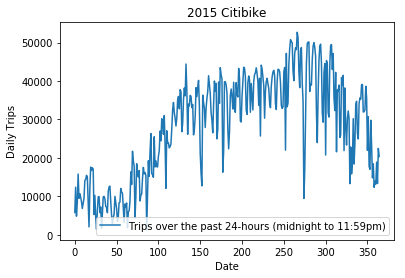

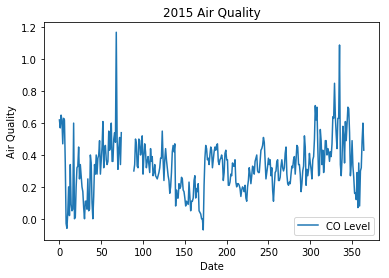

In [245]:
# Plot of one citibike df
rides_2015_df.plot()
plt.xlabel("Date"); plt.ylabel("Daily Trips"); plt.title("2015 Citibike")

# Plot of one air quality df
AQ_2015_df.plot()
plt.xlabel("Date"); plt.ylabel("Air Quality"); plt.title("2015 Air Quality")

For some reason the date is showing up at "XX days" in the year, as in Jan 1 = 0. Not sure how to fix that

Text(0.5, 1.0, '2016 Air Quality')

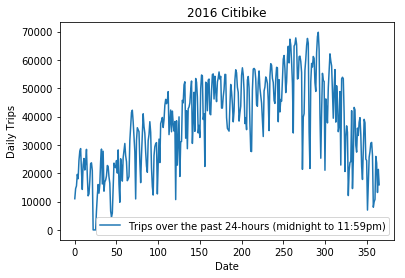

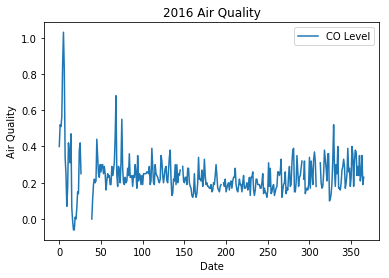

In [246]:
# Plot of one citibike df
rides_2016_df.plot()
plt.xlabel("Date"); plt.ylabel("Daily Trips"); plt.title("2016 Citibike")

# Plot of one air quality df
AQ_2016_df.plot()
plt.xlabel("Date"); plt.ylabel("Air Quality"); plt.title("2016 Air Quality")

Text(0.5, 1.0, '2017 Air Quality')

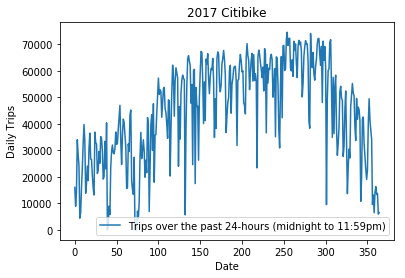

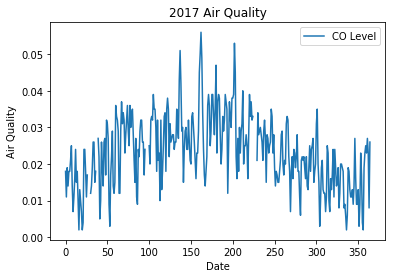

In [247]:
# Plot of one citibike df
rides_2017_df.plot()
plt.xlabel("Date"); plt.ylabel("Daily Trips"); plt.title("2017 Citibike")

# Plot of one air quality df
AQ_2017_df.plot()
plt.xlabel("Date"); plt.ylabel("Air Quality"); plt.title("2017 Air Quality")

Text(0.5, 1.0, '2018 Air Quality To Date')

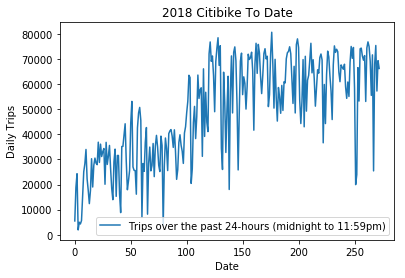

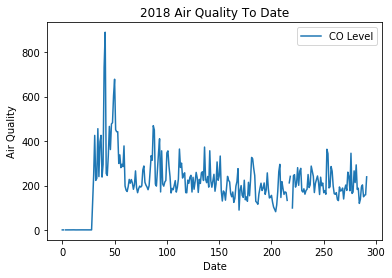

In [250]:
# Plot of one citibike df
rides_2018td_df.plot()
plt.xlabel("Date"); plt.ylabel("Daily Trips"); plt.title("2018 Citibike To Date")

# Plot of one air quality df
AQ_2018td_df.plot()
plt.xlabel("Date"); plt.ylabel("Air Quality"); plt.title("2018 Air Quality To Date")

As you can tell, there are missing values for air quality in the start of 2018 and there was something very bad happening around day 40 (feb)

Regression will be shown in R using these datapoints

Visualizations will be made in Tableau